## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Importing the Data & Data Preprocessing

In [2]:
churn = pd.read_csv("Churn_Modelling.csv")

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.shape

(10000, 14)

In [5]:
churn.duplicated().any()

False

In [6]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
churn.drop(columns=["RowNumber"], inplace=True)

In [10]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
cat_var = churn.select_dtypes(include=["object"]).columns
cat_var = cat_var[1:]
cat_var

Index(['Geography', 'Gender'], dtype='object')

In [12]:
num_var = churn.select_dtypes(include=["int", "float"]).columns
num_var = num_var[1:]
num_var

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

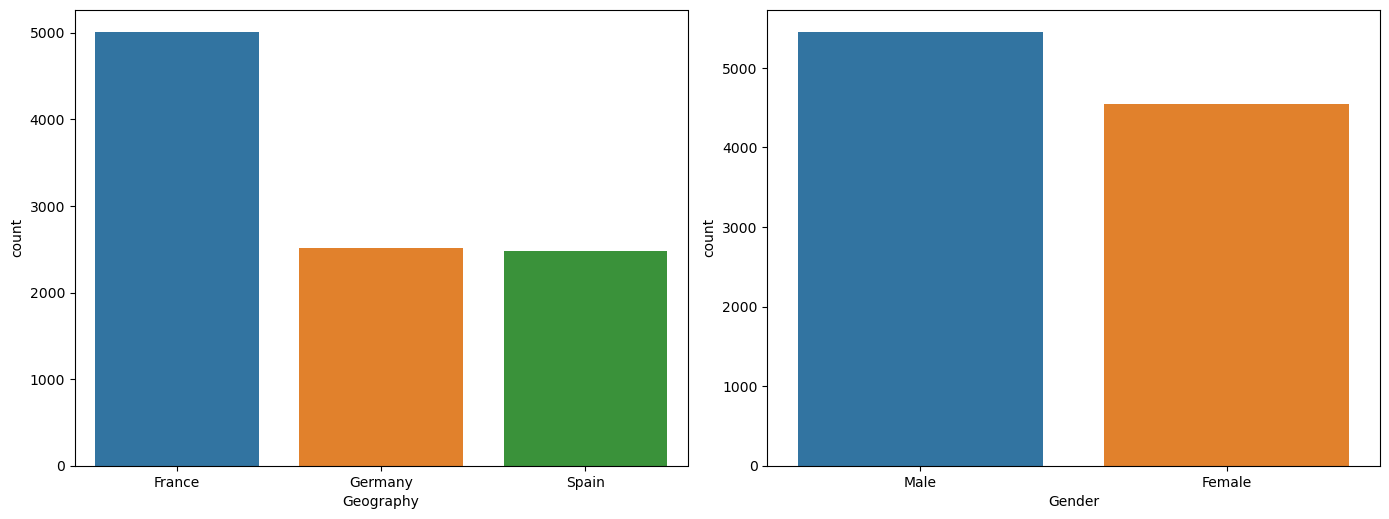

In [13]:
plt.figure(figsize=(14,10))
for i, col in enumerate(cat_var,1):
    plt.subplot(len(cat_var), 2,i)
    sns.countplot(data=churn, x=col, order=churn[col].value_counts().index)
    
plt.tight_layout()
plt.show()

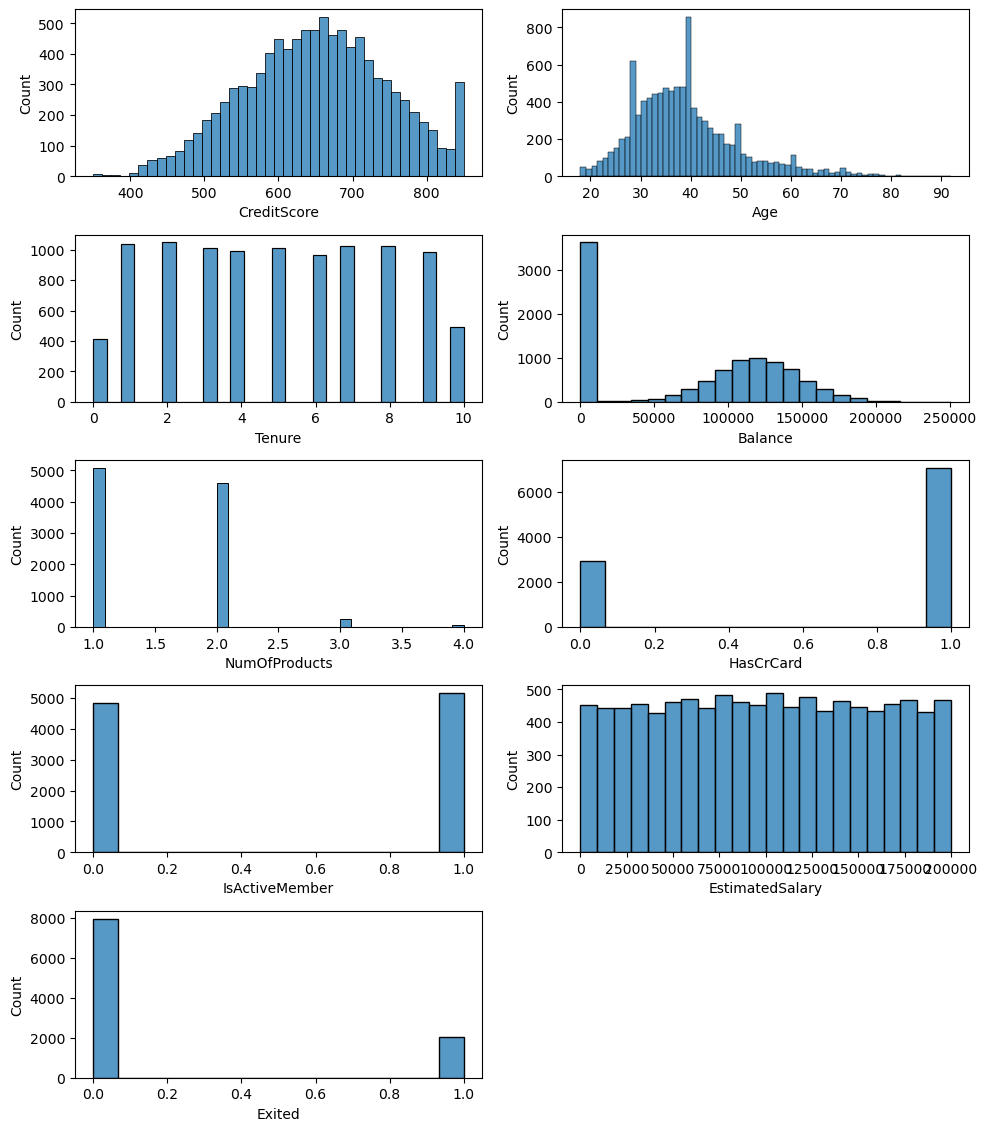

In [14]:
plt.figure(figsize=(10,20))
for i, col in enumerate(num_var,1):
    plt.subplot(len(num_var), 2,i)
    sns.histplot(data=churn, x=col)
    
plt.tight_layout()
plt.show()

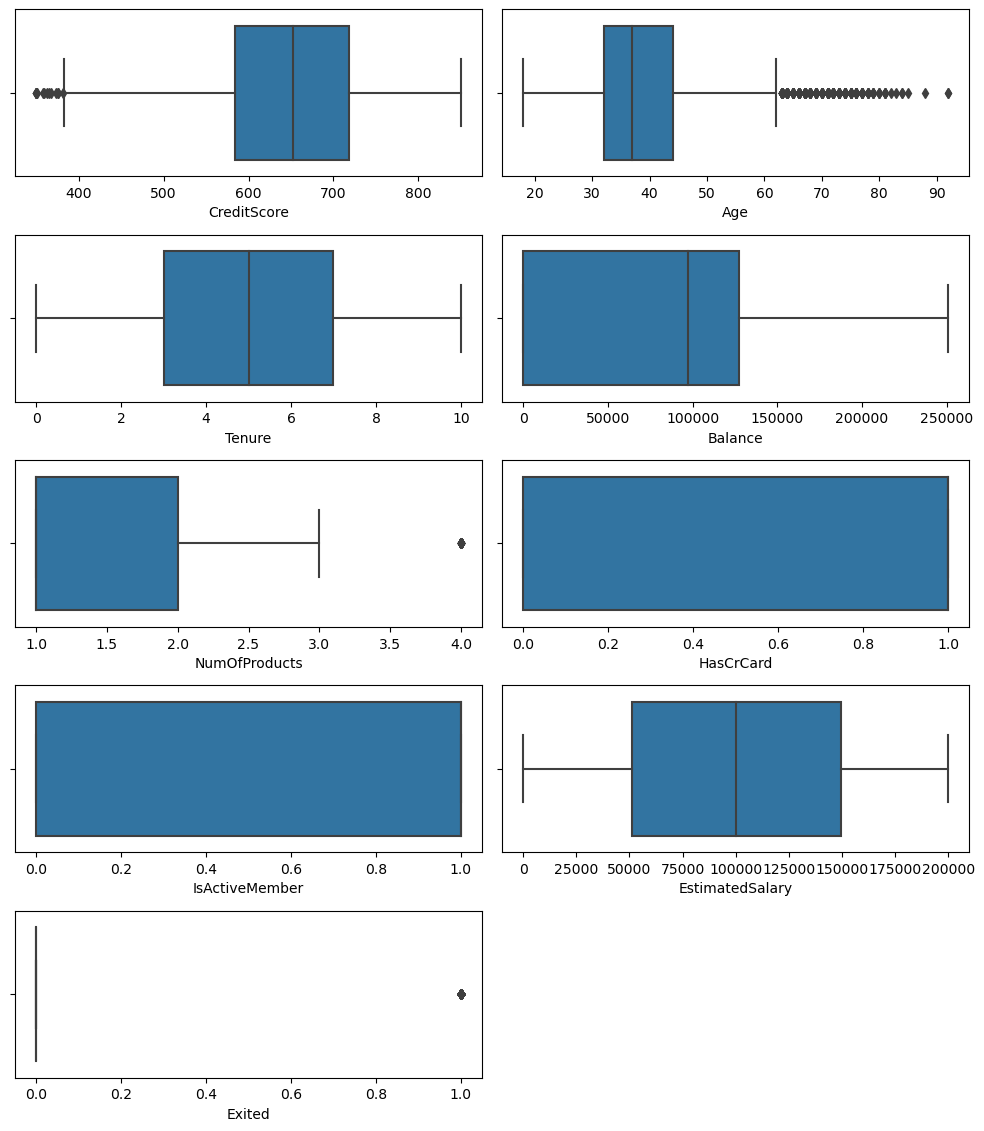

In [15]:
plt.figure(figsize=(10,20))
for i, col in enumerate(num_var,1):
    plt.subplot(len(num_var), 2,i)
    sns.boxplot(data=churn, x=col)
    
plt.tight_layout()
plt.show()

## Outliers in Age Column Check

In [16]:
q1 = churn["Age"].quantile(0.25)
q3 = churn["Age"].quantile(0.75)
iqr = q3 -q1
q1, iqr, q3

(32.0, 12.0, 44.0)

In [17]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(14.0, 62.0)

In [18]:
outlier = (churn.loc[(churn["Age"] > upper_limit) | (churn["Age"] < lower_limit)])
outlier

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [19]:
print(outlier["Age"].max())
print(outlier["Age"].min())
print("Since the outliers are due to customers who are aged. We can still consider them as part of the analysis")

92
63
Since the outliers are due to customers who are aged. We can still consider them as part of the analysis


In [20]:
outlier["Exited"].value_counts()

0    286
1     73
Name: Exited, dtype: int64

## EDA

### Plotting the categorical columns against the target column

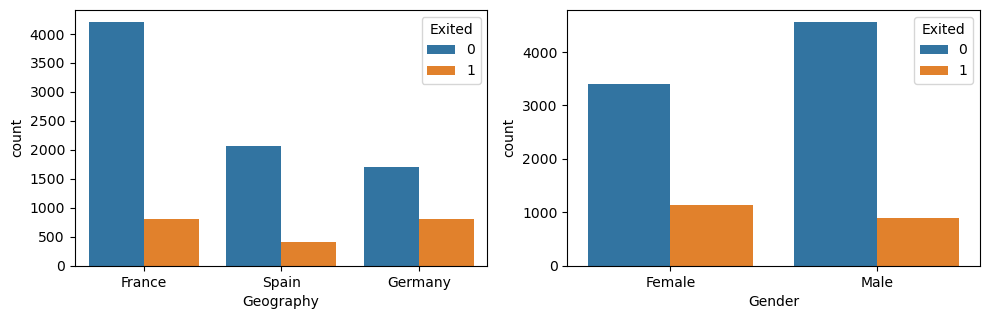

In [21]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(cat_var, 1):
    plt.subplot(len(cat_var), 2, i)
    sns.countplot(x=col, hue="Exited", data=churn)
    
plt.tight_layout()
plt.show()

<Axes: >

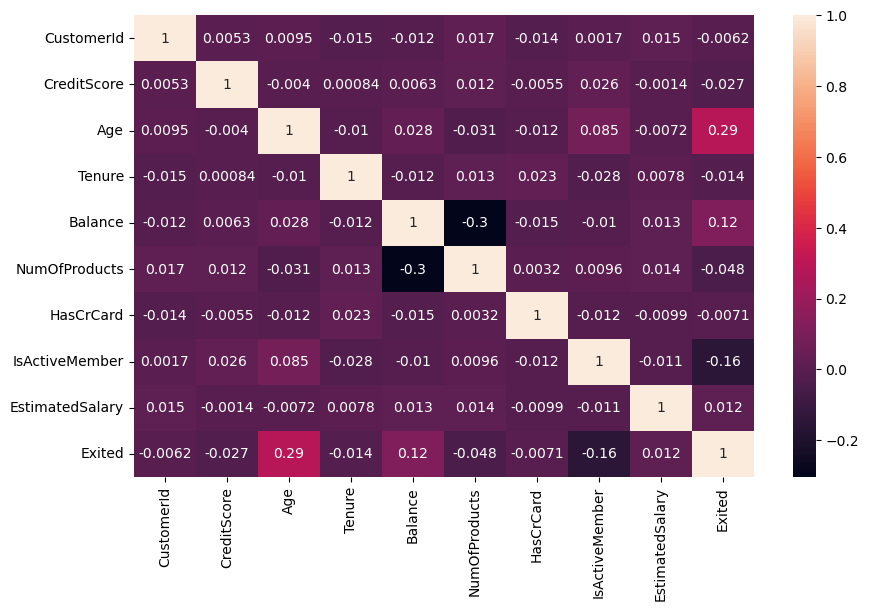

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(churn.corr(), annot=True)

In [23]:
data = churn.drop(columns=["CustomerId", "Surname", "HasCrCard"])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


## Model Training and Evaluation

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X = data.drop(columns=["Exited"])
y = data["Exited"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
num_col = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "IsActiveMember", "EstimatedSalary"]
cat_col = ["Geography", "Gender"]

In [28]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), num_col),
        ("cat", OneHotEncoder(drop="first"), cat_col)
    ]
)

In [29]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest Classifier" : RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree" : DecisionTreeClassifier(),
    "Support Vector Classifier" : SVC(probability=True),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "XGB Classifier" : XGBClassifier(random_state=42)
}

In [30]:
results = {}
for name, model in models.items():
    pipeline = Pipeline(
                [
                    ("preprocessor", preprocessor),
                    ("classifier", model)
                ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        "Cross Validation Score" : cv_scores,
        "Mean CV Accuray" : np.mean(cv_scores),
        "Test Accuracy" :accuracy
    }    

In [31]:
for name, metrics in results.items():
    print(name)
    print("Cross-Val Scores:", metrics["Cross Validation Score"])
    print("Mean CV Accuracy:", metrics["Mean CV Accuray"])
    print("Accuracy:", (metrics["Test Accuracy"])*100)
    print("\n")

Logistic Regression
Cross-Val Scores: [0.805    0.795    0.81875  0.811875 0.823125]
Mean CV Accuracy: 0.81075
Accuracy: 81.2


Random Forest Classifier
Cross-Val Scores: [0.85875  0.859375 0.87     0.86     0.85625 ]
Mean CV Accuracy: 0.8608750000000001
Accuracy: 86.35000000000001


Decision Tree
Cross-Val Scores: [0.76875  0.789375 0.78625  0.784375 0.77625 ]
Mean CV Accuracy: 0.781
Accuracy: 77.7


Support Vector Classifier
Cross-Val Scores: [0.865625 0.845625 0.86     0.8575   0.85375 ]
Mean CV Accuracy: 0.8564999999999999
Accuracy: 85.8


K-Nearest Neighbors
Cross-Val Scores: [0.848125 0.840625 0.840625 0.83375  0.839375]
Mean CV Accuracy: 0.8405000000000001
Accuracy: 84.5


XGB Classifier
Cross-Val Scores: [0.85     0.85125  0.86     0.853125 0.840625]
Mean CV Accuracy: 0.851
Accuracy: 86.0


